# Building an ensemble classifier

In [5]:
from sklearn.datasets import make_moons
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [13]:
moons = make_moons(n_samples=10000, noise=0.4)

In [14]:
from sklearn.model_selection import train_test_split

x = moons[0]
y = moons[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf), ('svc', svm_clf)], 
    voting="soft"
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [21]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_hat = clf.predict(x_test)
    print(clf, accuracy_score(y_test, y_hat))

LogisticRegression() 0.852
RandomForestClassifier() 0.853
SVC(probability=True) 0.877
VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft') 0.877


# Bagging and Pasting

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap=True,
                            n_jobs=-1, 
                            oob_score=True)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [61]:
tree_clf = DecisionTreeClassifier(max_depth=30)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_results(x, y, title):
    fig, axs = plt.subplots()
    plt.scatter(x[:, 0], x[:, 1], c=y)
    axs.set_xlabel("X1")
    axs.set_ylabel("X2")
    axs.set_title(title)

In [63]:
x_test[0]

array([ 0.53085945, -0.01111414])

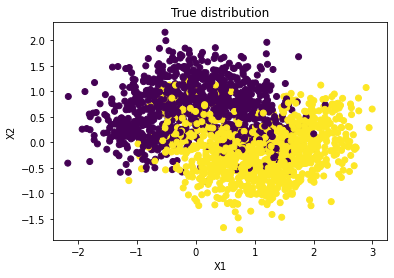

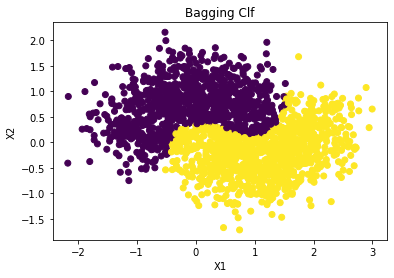

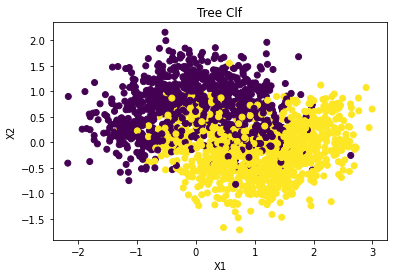

In [64]:
plot_results(x_test, y_test, title="True distribution")
plot_results(x_test, y_pred, title="Bagging Clf")
plot_results(x_test, y_pred_tree, title="Tree Clf")

In [66]:
bag_clf.oob_score_

0.856625

In [67]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.876

In [68]:
bag_clf.oob_decision_function_

array([[0.38414634, 0.61585366],
       [0.95757576, 0.04242424],
       [0.99188641, 0.00811359],
       ...,
       [0.9127789 , 0.0872211 ],
       [0.43259557, 0.56740443],
       [0.06262626, 0.93737374]])

# RandomForest

In [73]:
rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 n_jobs=-1,
                                 oob_score=True,
                                 # max_samples=100
                                )
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       oob_score=True)

In [74]:
rnd_clf.oob_score_

0.854375

### Builging last RandomForestClassifier with BaggingClassifier

In [76]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                            n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, 
                            oob_score=True)
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.8545

# Estimating relative features importance with RandomForest

In [79]:
from sklearn.datasets import load_iris

iris=load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09428085795625481
sepal width (cm) 0.02581588536917832
petal length (cm) 0.4482271420937941
petal width (cm) 0.4316761145807728
